In [1]:
#
# Import Libraries
#

import pickle
from dotmap import DotMap
import os
import numpy as np
import pandas as pd
import sys
from functools import reduce
import glob

import plotly.graph_objects as go
from plotly.subplots import make_subplots


utilsPath = r'S:\U_Proteomica\UNIDAD\software\MacrosRafa\data\Metabolomics\PESA_Integromics\Data\utils'
if utilsPath not in sys.path:
    sys.path.append(utilsPath)

from MyCorrelations import Xsplit, MyCorrelations
from pvalues_correlations import getH0, plotNullAlt, get_pvalues, graph_size, get_corrThr, adjust_pvalues

In [2]:
#
# Set constants
#

Qworking_path = r"S:\U_Proteomica\UNIDAD\software\MacrosRafa\data\Metabolomics\PESA_Integromics\Data\Proteomics\AWHS"
Mworking_path = r"S:\U_Proteomica\UNIDAD\software\MacrosRafa\data\Metabolomics\PESA_Integromics\Data\Metabolomics\AWHS"

# X
xq_path = os.path.join(Qworking_path, "WorkingFiles", "Xq_minus_X_norm.tsv")
mq_path = os.path.join(Mworking_path, "WorkingFiles", "Xm_norm_MS2.tsv")

# Feature info
q2i_path = os.path.join(Qworking_path, "WorkingFiles", "q2info.tsv")
m2i_path = os.path.join(Mworking_path, "WorkingFiles", "m2info.tsv")

# metadata
mdata_path = os.path.join(r"S:\U_Proteomica\UNIDAD\software\MacrosRafa\data\Metabolomics\PESA_Integromics\Data\Metadata\AWHS\WorkingFiles\main_metadata.tsv")

# RPath
rPath = r"S:\U_Proteomica\UNIDAD\software\MacrosRafa\data\Metabolomics\PESA_Integromics\Data\Analysis\02-Correlations\AWHS\myRData"

In [3]:
#
# Read data
#

xq = pd.read_csv(xq_path, sep='\t', index_col=0)
xm = pd.read_csv(mq_path, sep='\t', index_col=0)

q2i = pd.read_csv(q2i_path, sep='\t')
m2i = pd.read_csv(m2i_path, sep='\t')

mdata = pd.read_csv(mdata_path, sep='\t', index_col=0)

In [4]:
ctype_omic = {
    'psk': ['qq', 'mm', 'qm'],
    'pc': ['qq', 'mm'],
    'rpc': ['qq', 'mm'],
    'cca': ['qm'],
    'rcca': ['qm']
}

In [5]:
#
# Calculate correlations  
#

corr = MyCorrelations(xq, xm, mdata)
corr.PSK(methods=['pearson', 'spearman', 'kendall'])
corr.gLasso(test=False)
corr.PartialCorrelation()
corr.rCCA(rPath)
corr.CCA()

omic: qq
ss: a


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    4.5s remaining:    6.8s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    5.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[GraphicalLassoCV] Done refinement  1 out of 4:   5s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    3.5s remaining:    5.3s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    4.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[GraphicalLassoCV] Done refinement  2 out of 4:   9s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    5.9s remaining:    8.9s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    6.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[GraphicalLassoCV] Done refinement  3 out of 4:  15s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    6.9s remaining:   10.5s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    7.3s finished
c:\Users\rbarreror\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:232: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


[GraphicalLassoCV] Done refinement  4 out of 4:  23s
ss: c


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    1.5s remaining:    2.3s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[GraphicalLassoCV] Done refinement  1 out of 4:   2s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    3.2s remaining:    4.8s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[GraphicalLassoCV] Done refinement  2 out of 4:   5s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    5.7s remaining:    8.6s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    6.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[GraphicalLassoCV] Done refinement  3 out of 4:  12s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    6.2s remaining:    9.3s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    6.4s finished
c:\Users\rbarreror\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:232: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


[GraphicalLassoCV] Done refinement  4 out of 4:  18s
ss: d


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    1.5s remaining:    2.3s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[GraphicalLassoCV] Done refinement  1 out of 4:   2s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    3.0s remaining:    4.5s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[GraphicalLassoCV] Done refinement  2 out of 4:   5s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    5.5s remaining:    8.4s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    6.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[GraphicalLassoCV] Done refinement  3 out of 4:  11s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    6.2s remaining:    9.4s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    6.4s finished
c:\Users\rbarreror\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:232: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


[GraphicalLassoCV] Done refinement  4 out of 4:  18s
omic: mm
ss: a


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   11.2s remaining:   16.9s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   12.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[GraphicalLassoCV] Done refinement  1 out of 4:  12s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   25.4s remaining:   38.1s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   27.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[GraphicalLassoCV] Done refinement  2 out of 4:  40s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   33.6s remaining:   50.4s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   45.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[GraphicalLassoCV] Done refinement  3 out of 4:  85s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   52.3s remaining:  1.3min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   53.2s finished


[GraphicalLassoCV] Done refinement  4 out of 4:  139s


c:\Users\rbarreror\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:232: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


ss: c


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   12.4s remaining:   18.6s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   14.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[GraphicalLassoCV] Done refinement  1 out of 4:  14s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   15.0s remaining:   22.5s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   20.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[GraphicalLassoCV] Done refinement  2 out of 4:  35s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   35.2s remaining:   52.9s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   40.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[GraphicalLassoCV] Done refinement  3 out of 4:  75s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   26.5s remaining:   39.9s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   36.0s finished
c:\Users\rbarreror\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:232: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


[GraphicalLassoCV] Done refinement  4 out of 4:  111s
ss: d


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   11.9s remaining:   17.9s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   12.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[GraphicalLassoCV] Done refinement  1 out of 4:  12s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   15.9s remaining:   23.9s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   20.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[GraphicalLassoCV] Done refinement  2 out of 4:  33s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   24.5s remaining:   36.8s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   33.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[GraphicalLassoCV] Done refinement  3 out of 4:  67s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   46.7s remaining:  1.2min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   47.7s finished
c:\Users\rbarreror\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:232: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


[GraphicalLassoCV] Done refinement  4 out of 4:  114s
Omic: qq | Subset: a | Alpha: 0.2622
Omic: qq | Subset: c | Alpha: 0.2202
Omic: qq | Subset: d | Alpha: 0.2573
Omic: mm | Subset: a | Alpha: 0.6392
Omic: mm | Subset: c | Alpha: 0.8184
Omic: mm | Subset: d | Alpha: 0.6389
** Start script
Loading required package: MASS
Loading required package: lattice
Loading required package: ggplot2

Loaded mixOmics 6.22.0
Thank you for using mixOmics!
Tutorials: http://mixomics.org
Bookdown vignette: https://mixomicsteam.github.io/Bookdown
Questions, issues: Follow the prompts at http://mixomics.org/contact-us
Cite us:  citation('mixOmics')

Warning messages:
1: package 'mixOmics' was built under R version 4.2.1 
2: package 'MASS' was built under R version 4.2.2 
3: package 'ggplot2' was built under R version 4.2.2 
** Reading qq table
** Reading mm table
** Applying rCCA
** Calculating equiangular vectors
** qq projection
** mm projection
** Inner product
** Writing output table
** End Script

*

In [6]:
#
# Calculate Null Hypothesis Correlations
#

n = 10

corrSL = []
for xqsi in range(n):

    xqs = xq.copy()
    xms = xm.copy()

    _ = [np.random.shuffle(i) for i in xqs.to_numpy().T]
    _ = [np.random.shuffle(i) for i in xms.to_numpy().T]

    corrS = MyCorrelations(xqs, xms, mdata)
    corrS.PSK(methods=['pearson', 'spearman', 'kendall'])
    corrS.gLasso(test=False)
    corrS.PartialCorrelation()
    corrS.rCCA(rPath)
    corrS.CCA()
    corrSL.append(corrS)

omic: qq
ss: a


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   11.9s remaining:   17.9s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   12.1s finished


[GraphicalLassoCV] Done refinement  1 out of 4:  12s


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    1.7s remaining:    2.5s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[GraphicalLassoCV] Done refinement  2 out of 4:  14s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    1.4s remaining:    2.2s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[GraphicalLassoCV] Done refinement  3 out of 4:  16s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    1.3s remaining:    2.1s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.4s finished
c:\Users\rbarreror\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:232: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


[GraphicalLassoCV] Done refinement  4 out of 4:  17s
ss: c


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    3.5s remaining:    5.3s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    4.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[GraphicalLassoCV] Done refinement  1 out of 4:   4s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    2.3s remaining:    3.5s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[GraphicalLassoCV] Done refinement  2 out of 4:   6s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    1.3s remaining:    2.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[GraphicalLassoCV] Done refinement  3 out of 4:   8s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    1.4s remaining:    2.1s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.4s finished
c:\Users\rbarreror\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:232: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


[GraphicalLassoCV] Done refinement  4 out of 4:   9s
ss: d


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    3.1s remaining:    4.6s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[GraphicalLassoCV] Done refinement  1 out of 4:   3s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    1.8s remaining:    2.8s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[GraphicalLassoCV] Done refinement  2 out of 4:   5s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    1.3s remaining:    2.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[GraphicalLassoCV] Done refinement  3 out of 4:   6s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    1.3s remaining:    2.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.3s finished
c:\Users\rbarreror\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:232: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


[GraphicalLassoCV] Done refinement  4 out of 4:   8s
omic: mm
ss: a


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   22.2s remaining:   33.4s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   26.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[GraphicalLassoCV] Done refinement  1 out of 4:  26s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   13.9s remaining:   20.9s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   14.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[GraphicalLassoCV] Done refinement  2 out of 4:  41s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   12.5s remaining:   18.8s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   12.7s finished


[GraphicalLassoCV] Done refinement  3 out of 4:  54s


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   11.8s remaining:   17.8s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   12.1s finished


[GraphicalLassoCV] Done refinement  4 out of 4:  66s


c:\Users\rbarreror\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:232: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


ss: c


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   26.7s remaining:   40.1s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   29.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[GraphicalLassoCV] Done refinement  1 out of 4:  29s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   18.8s remaining:   28.2s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   18.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[GraphicalLassoCV] Done refinement  2 out of 4:  48s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   11.7s remaining:   17.6s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   12.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[GraphicalLassoCV] Done refinement  3 out of 4:  60s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   12.2s remaining:   18.4s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   12.4s finished
c:\Users\rbarreror\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:232: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


[GraphicalLassoCV] Done refinement  4 out of 4:  73s
ss: d


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   22.7s remaining:   34.2s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   23.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[GraphicalLassoCV] Done refinement  1 out of 4:  23s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   15.7s remaining:   23.6s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   16.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[GraphicalLassoCV] Done refinement  2 out of 4:  39s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   11.9s remaining:   17.9s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   12.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[GraphicalLassoCV] Done refinement  3 out of 4:  52s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   10.2s remaining:   15.4s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   10.4s finished


[GraphicalLassoCV] Done refinement  4 out of 4:  62s


c:\Users\rbarreror\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:232: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


Omic: qq | Subset: a | Alpha: 0.2265
Omic: qq | Subset: c | Alpha: 0.3491
Omic: qq | Subset: d | Alpha: 0.4412
Omic: mm | Subset: a | Alpha: 0.2468
Omic: mm | Subset: c | Alpha: 0.4407
Omic: mm | Subset: d | Alpha: 0.5155
** Start script
Loading required package: MASS
Loading required package: lattice
Loading required package: ggplot2

Loaded mixOmics 6.22.0
Thank you for using mixOmics!
Tutorials: http://mixomics.org
Bookdown vignette: https://mixomicsteam.github.io/Bookdown
Questions, issues: Follow the prompts at http://mixomics.org/contact-us
Cite us:  citation('mixOmics')

Warning messages:
1: package 'mixOmics' was built under R version 4.2.1 
2: package 'MASS' was built under R version 4.2.2 
3: package 'ggplot2' was built under R version 4.2.2 
** Reading qq table
** Reading mm table
** Applying rCCA
** Calculating equiangular vectors
** qq projection
** mm projection
** Inner product
** Writing output table
** End Script

** Start script
Loading required package: MASS
Loading 

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    9.8s remaining:   14.8s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   10.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[GraphicalLassoCV] Done refinement  1 out of 4:  10s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    2.0s remaining:    3.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[GraphicalLassoCV] Done refinement  2 out of 4:  13s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    1.3s remaining:    2.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[GraphicalLassoCV] Done refinement  3 out of 4:  14s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    1.4s remaining:    2.1s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.4s finished
c:\Users\rbarreror\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:232: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


[GraphicalLassoCV] Done refinement  4 out of 4:  16s
ss: c


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    3.4s remaining:    5.1s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    4.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[GraphicalLassoCV] Done refinement  1 out of 4:   4s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    2.3s remaining:    3.5s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[GraphicalLassoCV] Done refinement  2 out of 4:   7s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    1.5s remaining:    2.3s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[GraphicalLassoCV] Done refinement  3 out of 4:   9s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    1.6s remaining:    2.5s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.8s finished


[GraphicalLassoCV] Done refinement  4 out of 4:  10s


c:\Users\rbarreror\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:232: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


ss: d


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    3.5s remaining:    5.3s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    4.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[GraphicalLassoCV] Done refinement  1 out of 4:   4s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    2.4s remaining:    3.6s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[GraphicalLassoCV] Done refinement  2 out of 4:   6s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    1.3s remaining:    2.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[GraphicalLassoCV] Done refinement  3 out of 4:   8s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    1.3s remaining:    2.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.4s finished
c:\Users\rbarreror\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:232: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


[GraphicalLassoCV] Done refinement  4 out of 4:   9s
omic: mm
ss: a


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   23.2s remaining:   34.9s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   26.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[GraphicalLassoCV] Done refinement  1 out of 4:  26s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   15.3s remaining:   22.9s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   15.4s finished


[GraphicalLassoCV] Done refinement  2 out of 4:  42s


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   10.7s remaining:   16.2s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   11.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[GraphicalLassoCV] Done refinement  3 out of 4:  53s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   11.1s remaining:   16.7s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   11.3s finished


[GraphicalLassoCV] Done refinement  4 out of 4:  65s


c:\Users\rbarreror\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:232: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


ss: c


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   32.5s remaining:   48.8s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   34.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[GraphicalLassoCV] Done refinement  1 out of 4:  34s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   18.4s remaining:   27.7s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   19.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[GraphicalLassoCV] Done refinement  2 out of 4:  53s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   11.3s remaining:   16.9s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   11.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[GraphicalLassoCV] Done refinement  3 out of 4:  65s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   11.9s remaining:   18.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   12.5s finished


[GraphicalLassoCV] Done refinement  4 out of 4:  77s


c:\Users\rbarreror\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:232: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


ss: d


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   19.9s remaining:   29.9s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   20.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[GraphicalLassoCV] Done refinement  1 out of 4:  21s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   14.8s remaining:   22.3s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   15.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[GraphicalLassoCV] Done refinement  2 out of 4:  36s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   13.0s remaining:   19.5s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   13.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[GraphicalLassoCV] Done refinement  3 out of 4:  49s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   11.9s remaining:   17.9s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   12.0s finished


[GraphicalLassoCV] Done refinement  4 out of 4:  61s


c:\Users\rbarreror\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:232: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


Omic: qq | Subset: a | Alpha: 0.2254
Omic: qq | Subset: c | Alpha: 0.3456
Omic: qq | Subset: d | Alpha: 0.321
Omic: mm | Subset: a | Alpha: 0.2982
Omic: mm | Subset: c | Alpha: 0.4223
Omic: mm | Subset: d | Alpha: 0.3136
** Start script
Loading required package: MASS
Loading required package: lattice
Loading required package: ggplot2

Loaded mixOmics 6.22.0
Thank you for using mixOmics!
Tutorials: http://mixomics.org
Bookdown vignette: https://mixomicsteam.github.io/Bookdown
Questions, issues: Follow the prompts at http://mixomics.org/contact-us
Cite us:  citation('mixOmics')

Warning messages:
1: package 'mixOmics' was built under R version 4.2.1 
2: package 'MASS' was built under R version 4.2.2 
3: package 'ggplot2' was built under R version 4.2.2 
** Reading qq table
** Reading mm table
** Applying rCCA
** Calculating equiangular vectors
** qq projection
** mm projection
** Inner product
** Writing output table
** End Script

** Start script
Loading required package: MASS
Loading r

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    9.0s remaining:   13.6s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   11.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[GraphicalLassoCV] Done refinement  1 out of 4:  11s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    1.6s remaining:    2.5s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[GraphicalLassoCV] Done refinement  2 out of 4:  14s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    1.3s remaining:    2.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[GraphicalLassoCV] Done refinement  3 out of 4:  16s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    1.4s remaining:    2.2s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.5s finished
c:\Users\rbarreror\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:232: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


[GraphicalLassoCV] Done refinement  4 out of 4:  17s
ss: c


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    2.9s remaining:    4.4s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[GraphicalLassoCV] Done refinement  1 out of 4:   3s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    1.9s remaining:    3.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[GraphicalLassoCV] Done refinement  2 out of 4:   5s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    1.2s remaining:    1.9s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[GraphicalLassoCV] Done refinement  3 out of 4:   6s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    1.2s remaining:    1.9s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.3s finished
c:\Users\rbarreror\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:232: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


[GraphicalLassoCV] Done refinement  4 out of 4:   8s
ss: d


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    3.5s remaining:    5.2s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    4.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[GraphicalLassoCV] Done refinement  1 out of 4:   4s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    2.1s remaining:    3.3s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[GraphicalLassoCV] Done refinement  2 out of 4:   6s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    1.3s remaining:    2.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[GraphicalLassoCV] Done refinement  3 out of 4:   8s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.7s remaining:    1.2s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.1s finished
c:\Users\rbarreror\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:232: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


[GraphicalLassoCV] Done refinement  4 out of 4:   9s
omic: mm
ss: a


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   28.7s remaining:   43.1s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   33.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[GraphicalLassoCV] Done refinement  1 out of 4:  33s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   16.7s remaining:   25.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   16.8s finished


[GraphicalLassoCV] Done refinement  2 out of 4:  50s


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   12.4s remaining:   18.6s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   12.5s finished


[GraphicalLassoCV] Done refinement  3 out of 4:  62s


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   10.8s remaining:   16.3s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   11.4s finished


[GraphicalLassoCV] Done refinement  4 out of 4:  74s


c:\Users\rbarreror\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:232: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


ss: c


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   29.0s remaining:   43.5s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   30.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[GraphicalLassoCV] Done refinement  1 out of 4:  30s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   20.1s remaining:   30.2s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   20.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[GraphicalLassoCV] Done refinement  2 out of 4:  51s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   12.1s remaining:   18.2s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   12.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[GraphicalLassoCV] Done refinement  3 out of 4:  63s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   12.1s remaining:   18.2s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   12.3s finished


[GraphicalLassoCV] Done refinement  4 out of 4:  76s


c:\Users\rbarreror\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:232: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


ss: d


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   28.2s remaining:   42.3s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   28.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[GraphicalLassoCV] Done refinement  1 out of 4:  28s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   21.1s remaining:   31.7s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   22.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[GraphicalLassoCV] Done refinement  2 out of 4:  51s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   11.5s remaining:   17.2s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   11.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[GraphicalLassoCV] Done refinement  3 out of 4:  62s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   12.8s remaining:   19.3s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   13.0s finished


[GraphicalLassoCV] Done refinement  4 out of 4:  75s


c:\Users\rbarreror\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:232: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


Omic: qq | Subset: a | Alpha: 0.2003
Omic: qq | Subset: c | Alpha: 0.3598
Omic: qq | Subset: d | Alpha: 0.3795
Omic: mm | Subset: a | Alpha: 0.2423
Omic: mm | Subset: c | Alpha: 0.3704
Omic: mm | Subset: d | Alpha: 0.3804
** Start script
Loading required package: MASS
Loading required package: lattice
Loading required package: ggplot2

Loaded mixOmics 6.22.0
Thank you for using mixOmics!
Tutorials: http://mixomics.org
Bookdown vignette: https://mixomicsteam.github.io/Bookdown
Questions, issues: Follow the prompts at http://mixomics.org/contact-us
Cite us:  citation('mixOmics')

Warning messages:
1: package 'mixOmics' was built under R version 4.2.1 
2: package 'MASS' was built under R version 4.2.2 
3: package 'ggplot2' was built under R version 4.2.2 
** Reading qq table
** Reading mm table
** Applying rCCA
** Calculating equiangular vectors
** qq projection
** mm projection
** Inner product
** Writing output table
** End Script

** Start script
Loading required package: MASS
Loading 

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    8.5s remaining:   12.7s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    8.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[GraphicalLassoCV] Done refinement  1 out of 4:   8s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    1.8s remaining:    2.7s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[GraphicalLassoCV] Done refinement  2 out of 4:  11s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    1.2s remaining:    1.9s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[GraphicalLassoCV] Done refinement  3 out of 4:  12s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    1.3s remaining:    1.9s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.4s finished


[GraphicalLassoCV] Done refinement  4 out of 4:  14s


c:\Users\rbarreror\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:232: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


ss: c


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    2.6s remaining:    4.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[GraphicalLassoCV] Done refinement  1 out of 4:   3s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    2.5s remaining:    3.8s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[GraphicalLassoCV] Done refinement  2 out of 4:   6s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    2.8s remaining:    4.2s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[GraphicalLassoCV] Done refinement  3 out of 4:  10s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    2.6s remaining:    3.9s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.2s finished
c:\Users\rbarreror\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:232: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


[GraphicalLassoCV] Done refinement  4 out of 4:  13s
ss: d


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    7.0s remaining:   10.5s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    7.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[GraphicalLassoCV] Done refinement  1 out of 4:   7s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    6.2s remaining:    9.4s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    6.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[GraphicalLassoCV] Done refinement  2 out of 4:  14s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    2.2s remaining:    3.4s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[GraphicalLassoCV] Done refinement  3 out of 4:  16s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    2.5s remaining:    3.8s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.2s finished
c:\Users\rbarreror\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:232: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


[GraphicalLassoCV] Done refinement  4 out of 4:  20s
omic: mm
ss: a


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   55.3s remaining:  1.4min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.1min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[GraphicalLassoCV] Done refinement  1 out of 4:  68s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   24.6s remaining:   37.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   28.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[GraphicalLassoCV] Done refinement  2 out of 4:  97s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   19.2s remaining:   28.9s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   21.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[GraphicalLassoCV] Done refinement  3 out of 4:  119s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   19.8s remaining:   29.8s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   23.6s finished


[GraphicalLassoCV] Done refinement  4 out of 4:  142s


c:\Users\rbarreror\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:232: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


ss: c


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   41.1s remaining:  1.0min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   42.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[GraphicalLassoCV] Done refinement  1 out of 4:  42s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   18.7s remaining:   28.2s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   19.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[GraphicalLassoCV] Done refinement  2 out of 4:  62s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   12.4s remaining:   18.7s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   12.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[GraphicalLassoCV] Done refinement  3 out of 4:  74s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   13.6s remaining:   20.4s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   14.4s finished


[GraphicalLassoCV] Done refinement  4 out of 4:  89s


c:\Users\rbarreror\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:232: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


ss: d


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   48.6s remaining:  1.2min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   51.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[GraphicalLassoCV] Done refinement  1 out of 4:  51s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   30.9s remaining:   46.5s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   32.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[GraphicalLassoCV] Done refinement  2 out of 4:  83s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   17.8s remaining:   26.8s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   21.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[GraphicalLassoCV] Done refinement  3 out of 4:  105s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   22.6s remaining:   34.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   29.6s finished


[GraphicalLassoCV] Done refinement  4 out of 4:  135s


c:\Users\rbarreror\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:232: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


Omic: qq | Subset: a | Alpha: 0.2672
Omic: qq | Subset: c | Alpha: 0.3844
Omic: qq | Subset: d | Alpha: 0.3416
Omic: mm | Subset: a | Alpha: 0.2621
Omic: mm | Subset: c | Alpha: 0.4476
Omic: mm | Subset: d | Alpha: 0.3871
** Start script
Loading required package: MASS
Loading required package: lattice
Loading required package: ggplot2

Loaded mixOmics 6.22.0
Thank you for using mixOmics!
Tutorials: http://mixomics.org
Bookdown vignette: https://mixomicsteam.github.io/Bookdown
Questions, issues: Follow the prompts at http://mixomics.org/contact-us
Cite us:  citation('mixOmics')

Warning messages:
1: package 'mixOmics' was built under R version 4.2.1 
2: package 'MASS' was built under R version 4.2.2 
3: package 'ggplot2' was built under R version 4.2.2 
** Reading qq table
** Reading mm table
** Applying rCCA
** Calculating equiangular vectors
** qq projection
** mm projection
** Inner product
** Writing output table
** End Script

** Start script
Loading required package: MASS
Loading 

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   16.8s remaining:   25.3s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   17.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[GraphicalLassoCV] Done refinement  1 out of 4:  17s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    2.9s remaining:    4.4s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    4.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[GraphicalLassoCV] Done refinement  2 out of 4:  22s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    2.6s remaining:    3.9s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[GraphicalLassoCV] Done refinement  3 out of 4:  25s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    2.7s remaining:    4.1s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.8s finished
c:\Users\rbarreror\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:232: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


[GraphicalLassoCV] Done refinement  4 out of 4:  28s
ss: c


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    5.7s remaining:    8.6s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    6.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[GraphicalLassoCV] Done refinement  1 out of 4:   6s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    3.7s remaining:    5.7s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[GraphicalLassoCV] Done refinement  2 out of 4:  10s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    2.3s remaining:    3.6s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[GraphicalLassoCV] Done refinement  3 out of 4:  12s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    2.2s remaining:    3.4s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.4s finished


[GraphicalLassoCV] Done refinement  4 out of 4:  15s


c:\Users\rbarreror\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:232: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


ss: d


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    6.0s remaining:    9.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    6.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[GraphicalLassoCV] Done refinement  1 out of 4:   6s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    4.5s remaining:    6.7s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    4.7s finished


[GraphicalLassoCV] Done refinement  2 out of 4:  11s


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    2.4s remaining:    3.7s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[GraphicalLassoCV] Done refinement  3 out of 4:  14s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    2.4s remaining:    3.6s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.5s finished


[GraphicalLassoCV] Done refinement  4 out of 4:  16s


c:\Users\rbarreror\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:232: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


omic: mm
ss: a


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   43.4s remaining:  1.1min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   48.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[GraphicalLassoCV] Done refinement  1 out of 4:  48s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   21.7s remaining:   32.5s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   21.8s finished


[GraphicalLassoCV] Done refinement  2 out of 4:  70s


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   15.3s remaining:   23.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   15.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[GraphicalLassoCV] Done refinement  3 out of 4:  86s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   14.0s remaining:   21.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   14.2s finished


[GraphicalLassoCV] Done refinement  4 out of 4:  100s


c:\Users\rbarreror\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:232: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


ss: c


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   36.8s remaining:   55.2s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   39.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[GraphicalLassoCV] Done refinement  1 out of 4:  39s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   27.1s remaining:   40.6s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   27.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[GraphicalLassoCV] Done refinement  2 out of 4:  67s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   15.9s remaining:   23.9s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   16.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[GraphicalLassoCV] Done refinement  3 out of 4:  83s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   15.6s remaining:   23.4s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   15.8s finished


[GraphicalLassoCV] Done refinement  4 out of 4:  99s


c:\Users\rbarreror\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:232: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


ss: d


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   33.9s remaining:   50.8s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   38.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[GraphicalLassoCV] Done refinement  1 out of 4:  38s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   23.2s remaining:   34.8s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   23.4s finished


[GraphicalLassoCV] Done refinement  2 out of 4:  62s


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   15.5s remaining:   23.3s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   15.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[GraphicalLassoCV] Done refinement  3 out of 4:  78s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   15.4s remaining:   23.1s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   15.9s finished


[GraphicalLassoCV] Done refinement  4 out of 4:  94s


c:\Users\rbarreror\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:232: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


Omic: qq | Subset: a | Alpha: 0.2256
Omic: qq | Subset: c | Alpha: 0.3097
Omic: qq | Subset: d | Alpha: 0.3364
Omic: mm | Subset: a | Alpha: 0.2759
Omic: mm | Subset: c | Alpha: 0.3833
Omic: mm | Subset: d | Alpha: 0.3675
** Start script
Loading required package: MASS
Loading required package: lattice
Loading required package: ggplot2

Loaded mixOmics 6.22.0
Thank you for using mixOmics!
Tutorials: http://mixomics.org
Bookdown vignette: https://mixomicsteam.github.io/Bookdown
Questions, issues: Follow the prompts at http://mixomics.org/contact-us
Cite us:  citation('mixOmics')

Warning messages:
1: package 'mixOmics' was built under R version 4.2.1 
2: package 'MASS' was built under R version 4.2.2 
3: package 'ggplot2' was built under R version 4.2.2 
** Reading qq table
** Reading mm table
** Applying rCCA
** Calculating equiangular vectors
** qq projection
** mm projection
** Inner product
** Writing output table
** End Script

** Start script
Loading required package: MASS
Loading 

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    8.7s remaining:   13.2s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   11.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[GraphicalLassoCV] Done refinement  1 out of 4:  11s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    1.9s remaining:    3.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[GraphicalLassoCV] Done refinement  2 out of 4:  14s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    1.4s remaining:    2.2s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[GraphicalLassoCV] Done refinement  3 out of 4:  16s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    1.6s remaining:    2.4s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.6s finished
c:\Users\rbarreror\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:232: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


[GraphicalLassoCV] Done refinement  4 out of 4:  17s
ss: c


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    2.6s remaining:    4.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[GraphicalLassoCV] Done refinement  1 out of 4:   3s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    1.9s remaining:    2.9s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[GraphicalLassoCV] Done refinement  2 out of 4:   5s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    1.1s remaining:    1.7s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[GraphicalLassoCV] Done refinement  3 out of 4:   6s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    1.1s remaining:    1.7s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.2s finished
c:\Users\rbarreror\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:232: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


[GraphicalLassoCV] Done refinement  4 out of 4:   7s
ss: d


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    3.3s remaining:    4.9s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[GraphicalLassoCV] Done refinement  1 out of 4:   3s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    2.2s remaining:    3.3s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[GraphicalLassoCV] Done refinement  2 out of 4:   5s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    1.3s remaining:    2.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[GraphicalLassoCV] Done refinement  3 out of 4:   7s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    1.3s remaining:    2.1s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.4s finished
c:\Users\rbarreror\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:232: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


[GraphicalLassoCV] Done refinement  4 out of 4:   8s
omic: mm
ss: a


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   32.1s remaining:   48.2s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   36.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[GraphicalLassoCV] Done refinement  1 out of 4:  36s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   15.1s remaining:   22.7s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   15.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[GraphicalLassoCV] Done refinement  2 out of 4:  52s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   10.8s remaining:   16.3s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   11.0s finished


[GraphicalLassoCV] Done refinement  3 out of 4:  63s


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   12.3s remaining:   18.5s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   12.6s finished


[GraphicalLassoCV] Done refinement  4 out of 4:  76s


c:\Users\rbarreror\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:232: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


ss: c


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   30.5s remaining:   45.8s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   31.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[GraphicalLassoCV] Done refinement  1 out of 4:  31s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   19.6s remaining:   29.4s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   20.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[GraphicalLassoCV] Done refinement  2 out of 4:  52s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   12.2s remaining:   18.3s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   12.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[GraphicalLassoCV] Done refinement  3 out of 4:  64s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   11.9s remaining:   17.8s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   12.0s finished


[GraphicalLassoCV] Done refinement  4 out of 4:  76s


c:\Users\rbarreror\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:232: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


ss: d


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   23.8s remaining:   35.8s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   25.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[GraphicalLassoCV] Done refinement  1 out of 4:  25s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   15.0s remaining:   22.5s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   15.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[GraphicalLassoCV] Done refinement  2 out of 4:  40s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   10.9s remaining:   16.5s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   11.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[GraphicalLassoCV] Done refinement  3 out of 4:  52s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    9.9s remaining:   14.9s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   10.1s finished


[GraphicalLassoCV] Done refinement  4 out of 4:  62s


c:\Users\rbarreror\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:232: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


Omic: qq | Subset: a | Alpha: 0.2165
Omic: qq | Subset: c | Alpha: 0.4181
Omic: qq | Subset: d | Alpha: 0.3222
Omic: mm | Subset: a | Alpha: 0.257
Omic: mm | Subset: c | Alpha: 0.4055
Omic: mm | Subset: d | Alpha: 0.4064
** Start script
Loading required package: MASS
Loading required package: lattice
Loading required package: ggplot2

Loaded mixOmics 6.22.0
Thank you for using mixOmics!
Tutorials: http://mixomics.org
Bookdown vignette: https://mixomicsteam.github.io/Bookdown
Questions, issues: Follow the prompts at http://mixomics.org/contact-us
Cite us:  citation('mixOmics')

Warning messages:
1: package 'mixOmics' was built under R version 4.2.1 
2: package 'MASS' was built under R version 4.2.2 
3: package 'ggplot2' was built under R version 4.2.2 
** Reading qq table
** Reading mm table
** Applying rCCA
** Calculating equiangular vectors
** qq projection
** mm projection
** Inner product
** Writing output table
** End Script

** Start script
Loading required package: MASS
Loading r

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    8.9s remaining:   13.4s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    9.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[GraphicalLassoCV] Done refinement  1 out of 4:   9s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    1.8s remaining:    2.8s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[GraphicalLassoCV] Done refinement  2 out of 4:  12s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    1.4s remaining:    2.2s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[GraphicalLassoCV] Done refinement  3 out of 4:  13s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    1.4s remaining:    2.2s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.5s finished
c:\Users\rbarreror\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:232: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


[GraphicalLassoCV] Done refinement  4 out of 4:  15s
ss: c


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    3.6s remaining:    5.4s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    4.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[GraphicalLassoCV] Done refinement  1 out of 4:   4s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    2.3s remaining:    3.5s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.5s finished


[GraphicalLassoCV] Done refinement  2 out of 4:   6s


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    1.4s remaining:    2.2s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[GraphicalLassoCV] Done refinement  3 out of 4:   8s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    1.4s remaining:    2.1s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.4s finished
c:\Users\rbarreror\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:232: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


[GraphicalLassoCV] Done refinement  4 out of 4:   9s
ss: d


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    3.6s remaining:    5.5s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    4.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[GraphicalLassoCV] Done refinement  1 out of 4:   4s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    2.7s remaining:    4.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[GraphicalLassoCV] Done refinement  2 out of 4:   7s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    1.4s remaining:    2.2s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[GraphicalLassoCV] Done refinement  3 out of 4:   8s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    1.4s remaining:    2.1s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.4s finished
c:\Users\rbarreror\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:232: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


[GraphicalLassoCV] Done refinement  4 out of 4:  10s
omic: mm
ss: a


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   26.0s remaining:   39.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   29.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[GraphicalLassoCV] Done refinement  1 out of 4:  30s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   16.5s remaining:   24.8s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   16.6s finished


[GraphicalLassoCV] Done refinement  2 out of 4:  46s


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   11.8s remaining:   17.7s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   11.9s finished


[GraphicalLassoCV] Done refinement  3 out of 4:  58s


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   11.6s remaining:   17.4s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   11.8s finished


[GraphicalLassoCV] Done refinement  4 out of 4:  70s


c:\Users\rbarreror\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:232: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


ss: c


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   29.5s remaining:   44.3s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   31.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[GraphicalLassoCV] Done refinement  1 out of 4:  31s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   18.4s remaining:   27.7s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   18.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[GraphicalLassoCV] Done refinement  2 out of 4:  50s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   11.6s remaining:   17.4s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   11.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[GraphicalLassoCV] Done refinement  3 out of 4:  62s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   11.3s remaining:   16.9s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   11.4s finished


[GraphicalLassoCV] Done refinement  4 out of 4:  73s


c:\Users\rbarreror\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:232: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


ss: d


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   29.9s remaining:   44.9s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   31.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[GraphicalLassoCV] Done refinement  1 out of 4:  31s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   17.1s remaining:   25.7s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   17.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[GraphicalLassoCV] Done refinement  2 out of 4:  49s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   11.2s remaining:   16.9s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   11.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[GraphicalLassoCV] Done refinement  3 out of 4:  60s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   11.5s remaining:   17.2s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   11.7s finished


[GraphicalLassoCV] Done refinement  4 out of 4:  72s


c:\Users\rbarreror\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:232: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


Omic: qq | Subset: a | Alpha: 0.2417
Omic: qq | Subset: c | Alpha: 0.342
Omic: qq | Subset: d | Alpha: 0.3315
Omic: mm | Subset: a | Alpha: 0.2132
Omic: mm | Subset: c | Alpha: 0.415
Omic: mm | Subset: d | Alpha: 0.3693
** Start script
Loading required package: MASS
Loading required package: lattice
Loading required package: ggplot2

Loaded mixOmics 6.22.0
Thank you for using mixOmics!
Tutorials: http://mixomics.org
Bookdown vignette: https://mixomicsteam.github.io/Bookdown
Questions, issues: Follow the prompts at http://mixomics.org/contact-us
Cite us:  citation('mixOmics')

Warning messages:
1: package 'mixOmics' was built under R version 4.2.1 
2: package 'MASS' was built under R version 4.2.2 
3: package 'ggplot2' was built under R version 4.2.2 
** Reading qq table
** Reading mm table
** Applying rCCA
** Calculating equiangular vectors
** qq projection
** mm projection
** Inner product
** Writing output table
** End Script

** Start script
Loading required package: MASS
Loading re

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    9.1s remaining:   13.6s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   12.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[GraphicalLassoCV] Done refinement  1 out of 4:  12s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    1.8s remaining:    2.8s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[GraphicalLassoCV] Done refinement  2 out of 4:  15s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    1.3s remaining:    2.1s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[GraphicalLassoCV] Done refinement  3 out of 4:  16s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    1.4s remaining:    2.1s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.4s finished
c:\Users\rbarreror\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:232: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


[GraphicalLassoCV] Done refinement  4 out of 4:  18s
ss: c


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    3.4s remaining:    5.2s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[GraphicalLassoCV] Done refinement  1 out of 4:   3s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    2.2s remaining:    3.4s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[GraphicalLassoCV] Done refinement  2 out of 4:   6s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    1.4s remaining:    2.1s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[GraphicalLassoCV] Done refinement  3 out of 4:   8s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    1.5s remaining:    2.2s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.6s finished
c:\Users\rbarreror\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:232: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


[GraphicalLassoCV] Done refinement  4 out of 4:   9s
ss: d


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    2.9s remaining:    4.4s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[GraphicalLassoCV] Done refinement  1 out of 4:   3s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    2.2s remaining:    3.4s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[GraphicalLassoCV] Done refinement  2 out of 4:   6s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    1.4s remaining:    2.2s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[GraphicalLassoCV] Done refinement  3 out of 4:   7s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    1.4s remaining:    2.2s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.5s finished
c:\Users\rbarreror\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:232: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


[GraphicalLassoCV] Done refinement  4 out of 4:   9s
omic: mm
ss: a


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   30.4s remaining:   45.7s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   34.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[GraphicalLassoCV] Done refinement  1 out of 4:  34s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   16.5s remaining:   24.8s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   16.6s finished


[GraphicalLassoCV] Done refinement  2 out of 4:  51s


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   11.9s remaining:   18.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   12.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[GraphicalLassoCV] Done refinement  3 out of 4:  63s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    7.5s remaining:   11.2s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    9.5s finished


[GraphicalLassoCV] Done refinement  4 out of 4:  73s


c:\Users\rbarreror\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:232: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


ss: c


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   26.2s remaining:   39.4s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   27.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[GraphicalLassoCV] Done refinement  1 out of 4:  27s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   18.0s remaining:   27.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   18.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[GraphicalLassoCV] Done refinement  2 out of 4:  45s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   12.0s remaining:   18.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   12.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[GraphicalLassoCV] Done refinement  3 out of 4:  58s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   11.4s remaining:   17.1s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   11.9s finished


[GraphicalLassoCV] Done refinement  4 out of 4:  70s


c:\Users\rbarreror\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:232: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


ss: d


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   25.4s remaining:   38.2s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   26.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[GraphicalLassoCV] Done refinement  1 out of 4:  26s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   17.0s remaining:   25.6s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   17.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[GraphicalLassoCV] Done refinement  2 out of 4:  43s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   11.4s remaining:   17.2s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   11.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[GraphicalLassoCV] Done refinement  3 out of 4:  55s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   12.2s remaining:   18.4s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   12.5s finished


[GraphicalLassoCV] Done refinement  4 out of 4:  68s


c:\Users\rbarreror\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:232: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


Omic: qq | Subset: a | Alpha: 0.2112
Omic: qq | Subset: c | Alpha: 0.3404
Omic: qq | Subset: d | Alpha: 0.3191
Omic: mm | Subset: a | Alpha: 0.2778
Omic: mm | Subset: c | Alpha: 0.4239
Omic: mm | Subset: d | Alpha: 0.3475
** Start script
Loading required package: MASS
Loading required package: lattice
Loading required package: ggplot2

Loaded mixOmics 6.22.0
Thank you for using mixOmics!
Tutorials: http://mixomics.org
Bookdown vignette: https://mixomicsteam.github.io/Bookdown
Questions, issues: Follow the prompts at http://mixomics.org/contact-us
Cite us:  citation('mixOmics')

Warning messages:
1: package 'mixOmics' was built under R version 4.2.1 
2: package 'MASS' was built under R version 4.2.2 
3: package 'ggplot2' was built under R version 4.2.2 
** Reading qq table
** Reading mm table
** Applying rCCA
** Calculating equiangular vectors
** qq projection
** mm projection
** Inner product
** Writing output table
** End Script

** Start script
Loading required package: MASS
Loading 

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    9.5s remaining:   14.3s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   10.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[GraphicalLassoCV] Done refinement  1 out of 4:  10s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    2.0s remaining:    3.1s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[GraphicalLassoCV] Done refinement  2 out of 4:  13s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    1.4s remaining:    2.1s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[GraphicalLassoCV] Done refinement  3 out of 4:  15s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    1.3s remaining:    2.1s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.4s finished
c:\Users\rbarreror\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:232: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


[GraphicalLassoCV] Done refinement  4 out of 4:  16s
ss: c


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    3.6s remaining:    5.5s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    4.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[GraphicalLassoCV] Done refinement  1 out of 4:   4s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    2.6s remaining:    4.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[GraphicalLassoCV] Done refinement  2 out of 4:   7s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    1.4s remaining:    2.1s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[GraphicalLassoCV] Done refinement  3 out of 4:   9s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    1.4s remaining:    2.1s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.4s finished
c:\Users\rbarreror\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:232: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


[GraphicalLassoCV] Done refinement  4 out of 4:  10s
ss: d


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    3.8s remaining:    5.7s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    4.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[GraphicalLassoCV] Done refinement  1 out of 4:   4s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    2.6s remaining:    4.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[GraphicalLassoCV] Done refinement  2 out of 4:   7s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    1.4s remaining:    2.2s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[GraphicalLassoCV] Done refinement  3 out of 4:   8s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    1.4s remaining:    2.2s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.5s finished
c:\Users\rbarreror\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:232: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


[GraphicalLassoCV] Done refinement  4 out of 4:  10s
omic: mm
ss: a


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   19.8s remaining:   29.7s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   24.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[GraphicalLassoCV] Done refinement  1 out of 4:  24s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   15.9s remaining:   23.9s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   16.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[GraphicalLassoCV] Done refinement  2 out of 4:  40s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   11.3s remaining:   17.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   11.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[GraphicalLassoCV] Done refinement  3 out of 4:  52s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   11.0s remaining:   16.5s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   11.2s finished


[GraphicalLassoCV] Done refinement  4 out of 4:  64s


c:\Users\rbarreror\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:232: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


ss: c


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   30.2s remaining:   45.3s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   31.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[GraphicalLassoCV] Done refinement  1 out of 4:  31s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   17.1s remaining:   25.7s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   17.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[GraphicalLassoCV] Done refinement  2 out of 4:  49s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   11.8s remaining:   17.8s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   12.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[GraphicalLassoCV] Done refinement  3 out of 4:  61s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   11.5s remaining:   17.3s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   11.7s finished


[GraphicalLassoCV] Done refinement  4 out of 4:  73s


c:\Users\rbarreror\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:232: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


ss: d


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   26.6s remaining:   40.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   27.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[GraphicalLassoCV] Done refinement  1 out of 4:  27s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   18.1s remaining:   27.2s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   18.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[GraphicalLassoCV] Done refinement  2 out of 4:  46s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   13.0s remaining:   19.5s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   13.2s finished


[GraphicalLassoCV] Done refinement  3 out of 4:  59s


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   11.5s remaining:   17.3s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   11.7s finished


[GraphicalLassoCV] Done refinement  4 out of 4:  71s


c:\Users\rbarreror\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:232: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


Omic: qq | Subset: a | Alpha: 0.2232
Omic: qq | Subset: c | Alpha: 0.3371
Omic: qq | Subset: d | Alpha: 0.323
Omic: mm | Subset: a | Alpha: 0.2835
Omic: mm | Subset: c | Alpha: 0.3774
Omic: mm | Subset: d | Alpha: 0.4489
** Start script
Loading required package: MASS
Loading required package: lattice
Loading required package: ggplot2

Loaded mixOmics 6.22.0
Thank you for using mixOmics!
Tutorials: http://mixomics.org
Bookdown vignette: https://mixomicsteam.github.io/Bookdown
Questions, issues: Follow the prompts at http://mixomics.org/contact-us
Cite us:  citation('mixOmics')

Warning messages:
1: package 'mixOmics' was built under R version 4.2.1 
2: package 'MASS' was built under R version 4.2.2 
3: package 'ggplot2' was built under R version 4.2.2 
** Reading qq table
** Reading mm table
** Applying rCCA
** Calculating equiangular vectors
** qq projection
** mm projection
** Inner product
** Writing output table
** End Script

** Start script
Loading required package: MASS
Loading r

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   11.5s remaining:   17.3s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   12.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[GraphicalLassoCV] Done refinement  1 out of 4:  13s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    2.4s remaining:    3.6s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[GraphicalLassoCV] Done refinement  2 out of 4:  16s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    1.7s remaining:    2.6s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[GraphicalLassoCV] Done refinement  3 out of 4:  18s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    1.7s remaining:    2.6s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.8s finished
c:\Users\rbarreror\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:232: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


[GraphicalLassoCV] Done refinement  4 out of 4:  20s
ss: c


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    4.6s remaining:    6.9s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    5.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[GraphicalLassoCV] Done refinement  1 out of 4:   5s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    3.1s remaining:    4.7s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[GraphicalLassoCV] Done refinement  2 out of 4:   8s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    1.8s remaining:    2.8s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[GraphicalLassoCV] Done refinement  3 out of 4:  10s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    2.1s remaining:    3.2s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.1s finished
c:\Users\rbarreror\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:232: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


[GraphicalLassoCV] Done refinement  4 out of 4:  12s
ss: d


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    4.4s remaining:    6.7s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    4.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[GraphicalLassoCV] Done refinement  1 out of 4:   4s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    2.8s remaining:    4.3s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[GraphicalLassoCV] Done refinement  2 out of 4:   8s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    1.6s remaining:    2.5s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[GraphicalLassoCV] Done refinement  3 out of 4:   9s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    1.9s remaining:    2.9s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.3s finished
c:\Users\rbarreror\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:232: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


[GraphicalLassoCV] Done refinement  4 out of 4:  12s
omic: mm
ss: a


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   34.2s remaining:   51.4s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   38.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[GraphicalLassoCV] Done refinement  1 out of 4:  38s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   21.5s remaining:   32.3s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   21.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[GraphicalLassoCV] Done refinement  2 out of 4:  60s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   15.8s remaining:   23.8s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   16.0s finished


[GraphicalLassoCV] Done refinement  3 out of 4:  76s


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   14.5s remaining:   21.8s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   15.0s finished


[GraphicalLassoCV] Done refinement  4 out of 4:  91s


c:\Users\rbarreror\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:232: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


ss: c


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   36.3s remaining:   54.5s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   38.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[GraphicalLassoCV] Done refinement  1 out of 4:  38s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   25.6s remaining:   38.4s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   26.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[GraphicalLassoCV] Done refinement  2 out of 4:  64s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   15.3s remaining:   23.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   15.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[GraphicalLassoCV] Done refinement  3 out of 4:  80s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   16.2s remaining:   24.3s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   16.6s finished


[GraphicalLassoCV] Done refinement  4 out of 4:  97s


c:\Users\rbarreror\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:232: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


ss: d


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   34.8s remaining:   52.3s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   37.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[GraphicalLassoCV] Done refinement  1 out of 4:  37s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   22.9s remaining:   34.5s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   23.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[GraphicalLassoCV] Done refinement  2 out of 4:  61s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   14.9s remaining:   22.5s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   15.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[GraphicalLassoCV] Done refinement  3 out of 4:  76s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   10.6s remaining:   16.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   13.9s finished


[GraphicalLassoCV] Done refinement  4 out of 4:  90s


c:\Users\rbarreror\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:232: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


Omic: qq | Subset: a | Alpha: 0.2406
Omic: qq | Subset: c | Alpha: 0.3226
Omic: qq | Subset: d | Alpha: 0.3485
Omic: mm | Subset: a | Alpha: 0.2559
Omic: mm | Subset: c | Alpha: 0.3934
Omic: mm | Subset: d | Alpha: 0.4676
** Start script
Loading required package: MASS
Loading required package: lattice
Loading required package: ggplot2

Loaded mixOmics 6.22.0
Thank you for using mixOmics!
Tutorials: http://mixomics.org
Bookdown vignette: https://mixomicsteam.github.io/Bookdown
Questions, issues: Follow the prompts at http://mixomics.org/contact-us
Cite us:  citation('mixOmics')

Warning messages:
1: package 'mixOmics' was built under R version 4.2.1 
2: package 'MASS' was built under R version 4.2.2 
3: package 'ggplot2' was built under R version 4.2.2 
** Reading qq table
** Reading mm table
** Applying rCCA
** Calculating equiangular vectors
** qq projection
** mm projection
** Inner product
** Writing output table
** End Script

** Start script
Loading required package: MASS
Loading 

In [7]:
# Write correlations

f = open('corr.pkl', 'wb')
pickle.dump([corr, corrSL], f)
f.close()

In [8]:
# Read correlations

f = open('corr.pkl', 'rb')
corr, corrSL = pickle.load(f)
f.close()

In [9]:
#
# Get null hypothesis
#

h0c = DotMap()

h0c.psk = getH0(corrSL, 'psk', ['qq', 'mm', 'qm'], ['a', 'c', 'd', 'dc'])
h0c.rpc = getH0(corrSL, 'rpc', ['qq', 'mm'], ['a', 'c', 'd', 'dc'])
h0c.pc = getH0(corrSL, 'pc', ['qq', 'mm'], ['a', 'c', 'd', 'dc'])
h0c.rcca = getH0(corrSL, 'rcca', ['qm'], ['a', 'c', 'd', 'dc'])
h0c.cca = getH0(corrSL, 'cca', ['qm'], ['a', 'c', 'd', 'dc'])

In [21]:
#
# Plot correlations Null vs Alternative
#

files = glob.glob(r'S:\U_Proteomica\UNIDAD\software\MacrosRafa\data\Metabolomics\PESA_Integromics\Data\Analysis\02-Correlations\AWHS\plots\*')
for f in files:
    os.remove(f)

plotNullAlt(corr, h0c, ctype_omic, absolute=False, size=5*10**5)

In [11]:
#
# Calculate pvalues
#

pvals = get_pvalues(corr, h0c, ctype_omic, size=10**5)

In [12]:
adpvals = adjust_pvalues(pvals, ctype_omic)

In [13]:
# Write correlations

f = open('pvals.pkl', 'wb')
pickle.dump((pvals, adpvals), f)
f.close()

In [14]:
# Read correlations

f = open('pvals.pkl', 'rb')
pvals, adpvals = pickle.load(f)
f.close()

In [15]:
#
# Get correlation threshold
#

pvalueThr = 0.01
#corrThr = get_corrThr(h0c, pvalueThr, ctype_omic)

#corrThr

In [16]:
#
# Graph size
# Applying adjusted pvalues

#edges, nodes = graph_size(ctype_omic, pvals, pvalueThr=pvalueThr)
edges, nodes = graph_size(ctype_omic, adpvals, pvalueThr=pvalueThr)

In [17]:
edges

qq               mm                qm              
      psk pc   rpc     psk    pc   rpc   psk    cca   rcca
a   13120  0  2073  145488  4659  5045  2522  25918  33498
c    6599  0  2540  122454  1778  4032  2022  41258  26114
d    7621  0  2357  127937  1961  4147   801      0  33848
dc      0  0  2953       0   977  2791     0  62499  42322

In [18]:
nodes

qq           mm             qm          
    psk pc  rpc  psk   pc  rpc  psk  cca rcca
a   381  0  370  656  644  508  547  752  875
c   381  0  380  656  563  403  521  862  816
d   381  0  373  656  570  470  350    0  853
dc    0  0  378    0  509  442    0  909  926

In [19]:
print('Graph Density | qq-rpc & mm-rpc & qm-rcca')
print()
print(f'Adjusted p-value: {pvalueThr}')
print()
print(f'qq: {round(100*2953/(xq.shape[1]*(xq.shape[1]-1)/2),2)}%')
print(f'mm: {round(100*2302/(xm.shape[1]*(xm.shape[1]-1)/2),2)}%')
print(f'qm: {round(100*40095/(xq.shape[1]*xm.shape[1]),2)}%')

Graph Density | qq-rpc & mm-rpc & qm-rcca

Adjusted p-value: 0.01

qq: 4.08%
mm: 1.07%
qm: 16.04%


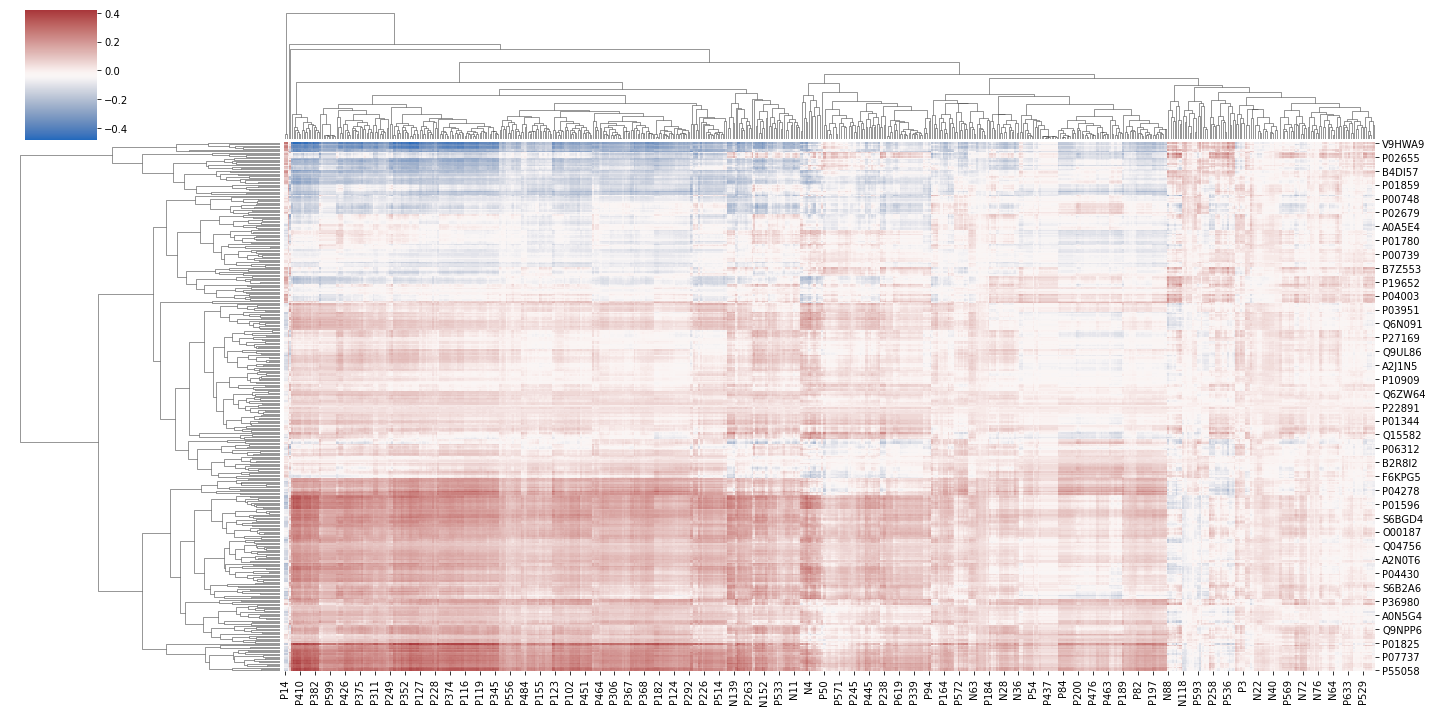

In [20]:
#
# Cluster Map
#

import seaborn as sns
import matplotlib.pyplot as plt
import scipy.spatial as sp, scipy.cluster.hierarchy as hc


df = corr.rcca.qm.dc
hmap = sns.clustermap(round(df,2), cmap='vlag', annot=False, figsize=(20,10), metric='euclidean', method='average')
